<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT11_clessify_flowers_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import listdir
from numpy import asarray
from numpy import save
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from keras.utils import to_categorical

In [20]:
folder = '/content/drive/MyDrive/Data_CNN/Train/flower'
flower = ['daisy', 'iris', 'rose', 'tulip', 'water_lily']
photos, lables = list(), list()
for i in range (5):
  filename = folder +'/'+ flower[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(40,40))
    photo = img_to_array(photo)
    photos.append(photo)
    lables.append(i)
photos_train = asarray(photos)
lables_train = asarray(lables)

In [21]:
print(photos_train.shape)
print(lables_train.shape)

(3538, 40, 40, 3)
(3538,)


In [22]:
from keras.utils import to_categorical
y_train = to_categorical(lables_train)
print(y_train.shape)

(3538, 5)


In [23]:
X_train = photos_train.astype('float32')/255

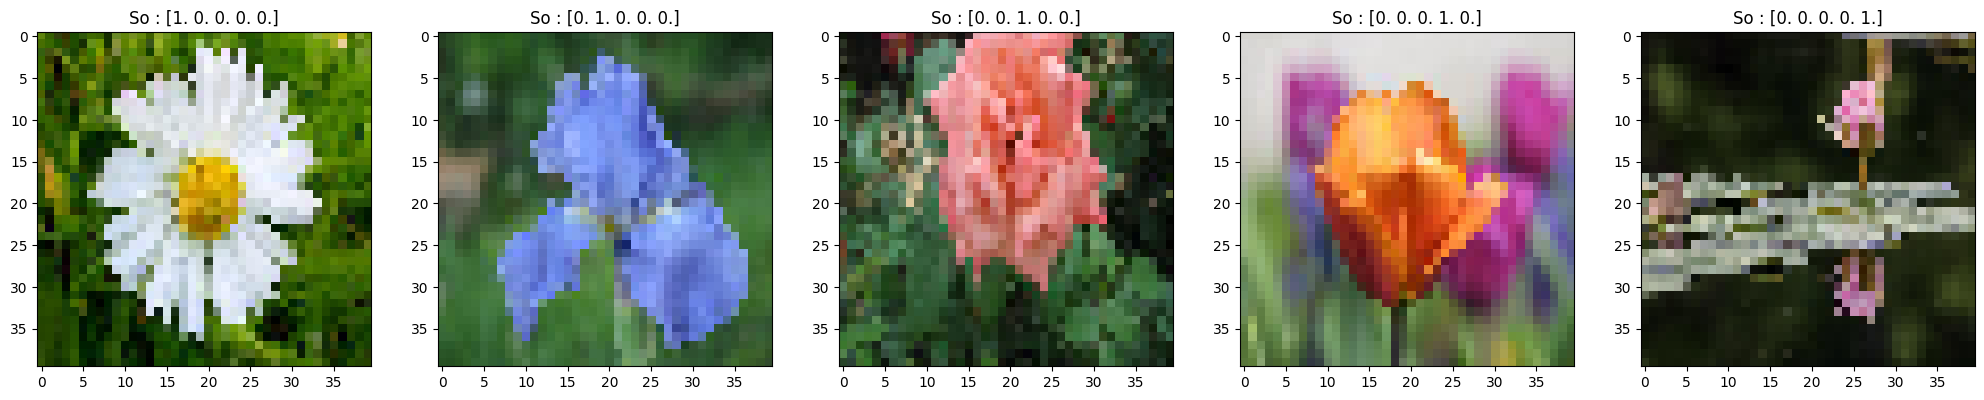

In [43]:
plt.figure(figsize = [25,25])

plt.subplot(151)
plt.imshow(X_train[200])
plt.title('So : {}'.format(y_train[200]))

plt.subplot(152)
plt.imshow(X_train[1300])
plt.title('So : {}'.format(y_train[1300]))

plt.subplot(153)
plt.imshow(X_train[2100])
plt.title('So : {}'.format(y_train[2100]))

plt.subplot(154)
plt.imshow(X_train[2500])
plt.title('So : {}'.format(y_train[2500]))

plt.subplot(155)
plt.imshow(X_train[3530])
plt.title('So : {}'.format(y_train[3530]))

plt.show()

In [44]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam #toc do hoc 0.01 with Adam
from keras.losses import categorical_crossentropy

In [45]:
batch_size = 64
epochs = 20
classes = 5

In [46]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation= 'linear', input_shape= (40,40,3), padding = 'same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(Flatten())
#-----------------------------------------------------------------------------------------------------------
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'] )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                    

In [47]:
train = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/20
56/56 [==============================] - 9s 10ms/step - loss: 1.2049 - accuracy: 0.5235
Epoch 2/20
56/56 [==============================] - 0s 7ms/step - loss: 0.8269 - accuracy: 0.6970
Epoch 3/20
56/56 [==============================] - 0s 7ms/step - loss: 0.6552 - accuracy: 0.7600
Epoch 4/20
56/56 [==============================] - 0s 7ms/step - loss: 0.4968 - accuracy: 0.8180
Epoch 5/20
56/56 [==============================] - 0s 7ms/step - loss: 0.3998 - accuracy: 0.8578
Epoch 6/20
56/56 [==============================] - 0s 7ms/step - loss: 0.3137 - accuracy: 0.8895
Epoch 7/20
56/56 [==============================] - 0s 7ms/step - loss: 0.2213 - accuracy: 0.9259
Epoch 8/20
56/56 [==============================] - 0s 8ms/step - loss: 0.1543 - accuracy: 0.9491
Epoch 9/20
56/56 [==============================] - 0s 8ms/step - loss: 0.1116 - accuracy: 0.9652
Epoch 10/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0862 - accuracy: 0.9743
Epoch 11/20
56/56 

In [50]:
folder = '/content/drive/MyDrive/Data_CNN/Test/flower'
flower = ['daisy', 'iris', 'rose', 'tulip', 'water_lily']
photos1, lables1 = list(), list()
for i in range (5):
  filename = folder +'/'+ flower[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(40,40))
    photo = img_to_array(photo)
    photos1.append(photo)
    lables1.append(i)
X_test = asarray(photos1)
y_test = asarray(lables1)

In [51]:
print(X_test.shape)
print(y_test.shape)

(1000, 40, 40, 3)
(1000,)


In [52]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
X_test = X_test.astype('float32')/255

32/32 [==============================] - 0s 5ms/step - loss: 0.8607 - accuracy: 0.8370
Test loss 0.8606625199317932
Test accuracy 0.8370000123977661


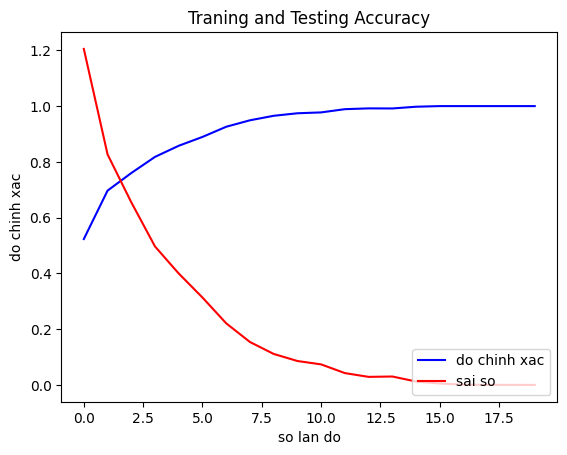

In [55]:
eval = model.evaluate(X_test, y_test)

print('Test loss',eval[0])
print('Test accuracy',eval[1])

accuracy=train.history['accuracy']
loss=train.history['loss']

epochs=range(len(accuracy))

plt.plot(epochs,accuracy,'b')
plt.plot(epochs,loss,'r')
plt.title('Traning and Testing Accuracy')
plt.ylabel('do chinh xac')
plt.xlabel('so lan do')
plt.legend(['do chinh xac','sai so'], loc = 'lower right')

1/1 [==============================] - 0s 21ms/step


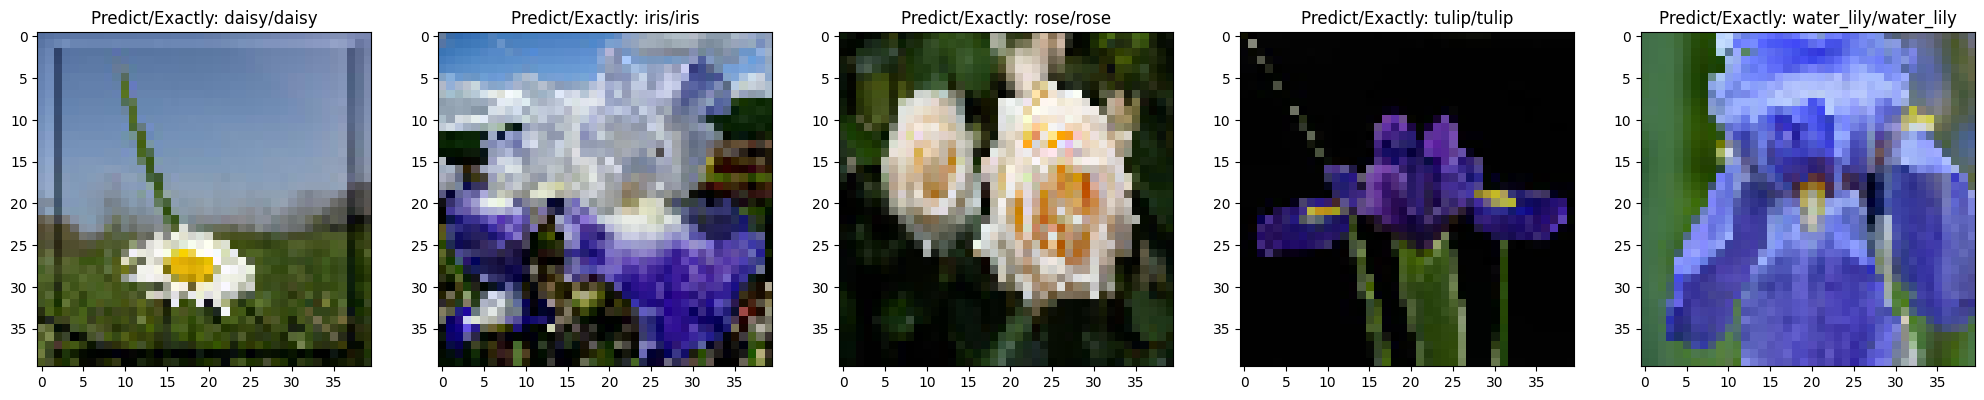

In [78]:
plt.figure(figsize = [25,25])

plt.subplot(151)
plt.imshow(X_test[100])
pred = model.predict(X_test[100].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(flower[pred.argmax()], flower[y_test[100].argmax()] ))

plt.subplot(152)
plt.imshow(X_test[301])
pred = model.predict(X_test[300].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(flower[pred.argmax()], flower[y_test[300].argmax()] ))

plt.subplot(153)
plt.imshow(X_test[500])
pred = model.predict(X_test[500].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(flower[pred.argmax()], flower[y_test[500].argmax()] ))

plt.subplot(154)
plt.imshow(X_train[700])
pred = model.predict(X_test[700].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(flower[pred.argmax()], flower[y_test[700].argmax()] ))

plt.subplot(155)
plt.imshow(X_train[850])
pred = model.predict(X_test[900].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(flower[pred.argmax()], flower[y_test[900].argmax()] ))

plt.show()